In [1]:
from IPython.display import HTML, Javascript, clear_output
import os
import sys

# Define the repo URL and folder name
REPO_URL = "https://github.com/rosinusserrano/autoencoding_experiments.git"
LOCAL_DIR = "/content/autoencoding_experiments"

# Inject a floating button with JavaScript
def inject_floating_button():
    display(HTML("""
    <script>
    function reloadRepo() {
        google.colab.kernel.invokeFunction('notebook.reload_repo', [], {});
    }
    const button = document.createElement('button');
    button.innerHTML = 'Reload Repo';
    button.style.position = 'fixed';
    button.style.bottom = '20px';
    button.style.right = '20px';
    button.style.backgroundColor = '#ff5050';
    button.style.color = 'white';
    button.style.border = 'none';
    button.style.padding = '10px 20px';
    button.style.borderRadius = '5px';
    button.style.boxShadow = '0px 4px 6px rgba(0,0,0,0.1)';
    button.style.cursor = 'pointer';
    button.onclick = reloadRepo;
    document.body.appendChild(button);
    </script>
    """))

def clone_and_import():
    # Clear output and display new button
    clear_output(wait=True)
    inject_floating_button()
    # Clone the repository if it doesn't exist
    if not os.path.exists(LOCAL_DIR):
        !git clone {REPO_URL} {LOCAL_DIR}
    else:
        # Pull the latest changes if the repo already exists
        !cd {LOCAL_DIR} && git pull

    # Append the repository to the system path
    if LOCAL_DIR not in sys.path:
        sys.path.append(LOCAL_DIR + "/src")
    print(f"Repository at '{LOCAL_DIR}' is ready for imports.")

# Register the Python function as a callable function for JavaScript
from google.colab import output
output.register_callback('notebook.reload_repo', clone_and_import)

# Inject the button
inject_floating_button()

# Initial setup
clone_and_import()

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (5/5), 440 bytes | 440.00 KiB/s, done.
From https://github.com/rosinusserrano/autoencoding_experiments
   6bf16f0..47eb11e  main       -> origin/main
Updating 6bf16f0..47eb11e
Fast-forward
 src/logger/caveman.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
Repository at '/content/autoencoding_experiments' is ready for imports.


In [1]:
%reload_ext autoreload
%autoreload 2

c:\Users\marco\Projects\autoencoding_experiments\.venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
On device: cpu
EPOCH 0: train_loss 3.9455
EPOCH 0: val_loss 0.3954
EPOCH 0: test_loss 0.5768
tensor(0.0006) tensor(1.0000)
EPOCH 1: train_loss 1.3070
EPOCH 1: val_loss 0.2895
EPOCH 1: test_loss 0.4117
tensor(0.1569) tensor(0.7380)
EPOCH 2: train_loss 0.8047
EPOCH 2: val_loss 0.3412
EPOCH 2: test_loss 0.3879
tensor(0.0640) tensor(0.9625)
EPOCH 3: train_loss 0.5680
EPOCH 3: val_loss 0.3885
EPOCH 3: test_loss 0.3714
tensor(0.0381) tensor(0.9985)
EPOCH 4: train_loss 0.4263
EPOCH 4: val_loss 0.3872
EPOCH 4: test_loss 0.4332
tensor(0.0483) tensor(0.9895)
EPOCH 5: train_loss 0.3515
EPOCH 5: val_loss 0.4106
EPOCH 5: test_loss 0.4903
tensor(0.0807) tensor(0.9689)
EPOCH 6: train_loss 0.3071
EPOCH 6: val_loss 0.3622
EPOCH 6: test_loss 0.4470
tensor(0.0879) tensor(0.8971)
EPOCH 7: train_loss 0.2721
EPOCH 7: val_loss 0.3247
EPOCH 7: test_loss 0.4369
tensor(0.0772) tensor(0.9554)
EPOCH 8: train_loss 0.2454
EPOCH 8: val_loss 

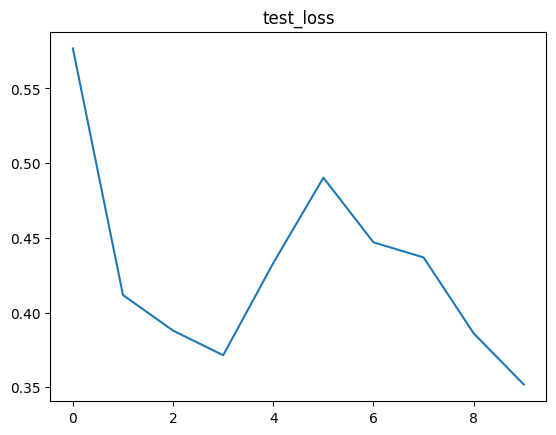

In [ ]:
from models.vae import VAEConfig
from datasets import DatasetConfig
from utils.train import TrainConfig
from logger.caveman import CavemanLogger

from experiments.vae_standard import train_standard_vae_on_cifar


model_config = VAEConfig(latent_channels=256)
dataset_config = DatasetConfig(
    dataset_name="cifar10",
    validation_split=0.1,
    batch_size=128,
    subset_ratio=0.01,
)
train_config = TrainConfig("adam", learning_rate=0.001, n_epochs=50)

logger = CavemanLogger("../runs", "vaetestlocal")

train_standard_vae_on_cifar(
    model_config=model_config,
    dataset_config=dataset_config,
    train_config=train_config,
    logger=logger,
    validation_interval=5,
    test_interval=5,
    visualization_interval=5,
)